In [1]:
import cv2
import mediapipe as mp
import numpy as np

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
#특징이 손 한개만인식 + 관절에 대한 인식률 좋음 + 

In [3]:
def imimim(image, canvers):
    canvers_gray = cv2.cvtColor(canvers, cv2.COLOR_BGR2GRAY)
    ret, canvers_mask = cv2.threshold(canvers_gray, 50, 255, cv2.THRESH_BINARY)
    
    canvers_mask_inv = cv2.bitwise_not(canvers)
    
    img1 = cv2.bitwise_and(canvers, canvers, mask=canvers_mask_inv)
    
cap = cv2.VideoCapture(0)
fingers = list()
canvers = np.zeros((720, 1280, 3))

with mp_hands.Hands(
    max_num_hands=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:

    while cap.isOpened():
        success, image = cap.read()
        if not success:
            continue
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
 
        results = hands.process(image)
 
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
 
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                finger1 = int(hand_landmarks.landmark[4].x * 100)
                finger2 = int(hand_landmarks.landmark[8].x * 100)
                dist = abs(finger1 - finger2)
                x = int(hand_landmarks.landmark[8].x * 1280)
                y = int(hand_landmarks.landmark[8].y * 720)
                fingers.append([x, y])
                #cv2.putText(
                #    image, text='f1=%d f2=%d dist=%d x=%d y=%d' % (finger1,finger2, dist, x, y), org=(10, 30),
                #    fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1,
                #    color=(255, 255, 255), thickness=3)
                #for index, finger in enumerate(fingers):
                if len(fingers) > 1:
                    a, b = np.array(fingers[-1]) - np.array(fingers[-2])
                    a = abs(a)
                    b = abs(b)
                    if a + b < 50:
                        cv2.line(canvers, fingers[len(fingers) - 2], fingers[len(fingers) - 1], (0, 255, 0), 2)
         #       mp_drawing.draw_landmarks(
         #           image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
        #cv2.imshow('images', image)
        answer = imimim(image, canvers)
        cv2.imshow('answer', answer)    
        #cv2.imshow('canvers', canvers)
        if cv2.waitKey(1) == ord('q'):
            break
cv2.destroyAllWindows()
cap.release()

error: OpenCV(4.5.4-dev) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [4]:
cv2.destroyAllWindows()

In [5]:
cap.release()

In [59]:
canvers[0,0] = [1, 1, 1]

In [61]:
canvers

array([[[1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [62]:
canvers_gray = cv2.cvtColor(canvers, cv2.COLOR_BGR2GRAY)

error: OpenCV(4.5.4-dev) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [74]:
a+b

201

In [133]:
image.shape

(720, 1280, 3)

In [122]:
type(hand_landmarks.landmark[0])

mediapipe.framework.formats.landmark_pb2.NormalizedLandmark

In [127]:
int(hand_landmarks.landmark[8])

TypeError: int() argument must be a string, a bytes-like object or a number, not 'google.protobuf.pyext._message.RepeatedCompositeContainer'

In [128]:
int(hand_landmarks.landmark[4].x * 100)

41

In [135]:
x = hand_landmarks.landmark[4].x * 720
y = hand_landmarks.landmark[4].y * 1280
x, y

(298.95517587661743, 985.9850311279297)

In [94]:
for i in mp_hands.HandLandmark:
    print(i)

HandLandmark.WRIST
HandLandmark.THUMB_CMC
HandLandmark.THUMB_MCP
HandLandmark.THUMB_IP
HandLandmark.THUMB_TIP
HandLandmark.INDEX_FINGER_MCP
HandLandmark.INDEX_FINGER_PIP
HandLandmark.INDEX_FINGER_DIP
HandLandmark.INDEX_FINGER_TIP
HandLandmark.MIDDLE_FINGER_MCP
HandLandmark.MIDDLE_FINGER_PIP
HandLandmark.MIDDLE_FINGER_DIP
HandLandmark.MIDDLE_FINGER_TIP
HandLandmark.RING_FINGER_MCP
HandLandmark.RING_FINGER_PIP
HandLandmark.RING_FINGER_DIP
HandLandmark.RING_FINGER_TIP
HandLandmark.PINKY_MCP
HandLandmark.PINKY_PIP
HandLandmark.PINKY_DIP
HandLandmark.PINKY_TIP


In [49]:
canvers.shape

(720, 1280, 3)

In [109]:
type(hand_landmarks.landmark)

google.protobuf.pyext._message.RepeatedCompositeContainer

In [110]:
type(hand_landmarks)

mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList

In [111]:
hand_landmarks.landmark()

[x: 0.8003247976303101
y: 0.8844618797302246
z: 4.2348435158601205e-07
, x: 0.7279078960418701
y: 0.8797726631164551
z: -0.021844375878572464
, x: 0.6657505631446838
y: 0.809512197971344
z: -0.032633718103170395
, x: 0.6276311874389648
y: 0.7397768497467041
z: -0.0415252260863781
, x: 0.5930855870246887
y: 0.6858194470405579
z: -0.05118269473314285
, x: 0.6832898259162903
y: 0.6678860187530518
z: -0.0261783879250288
, x: 0.6450040936470032
y: 0.5701324343681335
z: -0.04770170524716377
, x: 0.6232491135597229
y: 0.5032318830490112
z: -0.06474901735782623
, x: 0.6042885780334473
y: 0.44237080216407776
z: -0.07763636857271194
, x: 0.7272095084190369
y: 0.6247016787528992
z: -0.033510297536849976
, x: 0.6985877752304077
y: 0.4982147812843323
z: -0.05191555991768837
, x: 0.6800547242164612
y: 0.4146615266799927
z: -0.06988736987113953
, x: 0.6641190648078918
y: 0.34026312828063965
z: -0.08280781656503677
, x: 0.7763028740882874
y: 0.6173280477523804
z: -0.04337259754538536
, x: 0.7542322278

In [51]:
cv2.add()

error: OpenCV(4.5.4-dev) /Users/runner/work/opencv-python/opencv-python/opencv/modules/core/src/arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'


In [50]:
im = np.zeros((720, 1280, 1))

In [58]:
a, b = np.array(fingers[1]) - np.array(fingers[0])
a = abs(a)
b = abs(b)

In [4]:
im = cv2.imread('../../../../Downloads/image(1).png')

In [5]:
import matplotlib.pyplot as plt

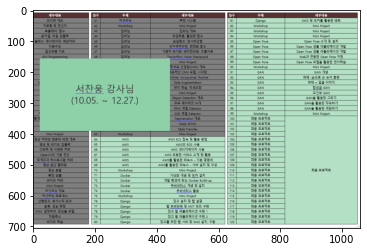

In [6]:
plt.imshow(im)

In [32]:
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [33]:
im.shape

(705, 1060, 3)

In [34]:
im_gray.shape

(705, 1060)

In [55]:
ret, im_mask = cv2.threshold(im_gray, 150, 255, cv2.THRESH_BINARY)

In [36]:
im_mask.shape

(705, 1060)

In [37]:
cv2.imshow('im_gray' ,im_gray)

In [38]:
cv2.imshow('mask' ,im_mask)

In [39]:
cv2.destroyAllWindows()

In [42]:
im_gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [230, 230, 230, ..., 230, 230, 230],
       [230, 230, 230, ..., 230, 230, 230],
       [230, 230, 230, ..., 230, 230, 230]], dtype=uint8)

In [43]:
im_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)